<h3>머신러닝 과제 1의 (2)번

# 2. 서포트 벡터 머신 (5점)


<h3><목차></h3><br>
(1) 선형적으로 분리되는 Iris 데이터셋을 읽는다. Iris Setosa와 Iris Versicolor 클래스는 선형적으로 구분이 가능하다.<br>
(2) LinearSVC를 훈련시킨다. 그런 다음 같은 데이터셋에 SVC와 SGDClassifier를 적용한다.<br>
(3) 위 세 분류기의 결정 경계를 그림으로 그려 비교한다.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

<b>(1) 선형적으로 분리되는 Iris 데이터셋을 읽는다. Iris Setosa와 Iris Versicolor 클래스는 선형적으로 구분이 가능하다.

In [4]:
# 모듈을 불러오는 것은 끝났으니, Iris dataset을 읽어봅시다

iris = datasets.load_iris();
X = iris["data"][:, (2,3)] # 데이터 중에서 2, 3번째 속성이 꽃잎 길이, 너비인데 이게 2,3 인걸 찾겠다
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

데이터가 어떻게 나뉘어져 있는지 궁금하므로, 데이터셋만 matplotlib으로 시각화해서 나타내 보겠습니다.

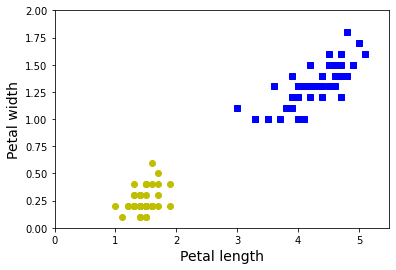

In [7]:
import matplotlib.pyplot as plt

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()


데이터가 매우 잘 나뉘어 있네요. 1차식 형태의 SVM 만 사용해도 데이터를 분류할 수 있을 것으로 보이고,<br>
데이터 끼리 겹치는 구역도 없어서 <b>hard margin 분류</b>로 해결할 수 있을 것으로 보입니다.

<b>(2) LinearSVC를 훈련시킨다. 그런 다음 같은 데이터셋에 SVC와 SGDClassifier를 적용한다.

먼저 LinearSVC부터 훈련시키도록 하겠습니다. Pipeline 모듈을 이용할 예정이고, hard margin 분류로 쉽게 구분이 가능하므로<br>
LinearSVC의 규제 하이퍼 파라미터인 C값은 작게 설정해보도록 하겠습니다. (그래야 마진이 넓어지거든요.)

In [8]:
#LinearSVC 적용 모델, 변수 이름 lin_clf
#이걸 파이프라인으로 훈련해보자

lin_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearSVC(C=1, loss = "hinge")),
    
])

lin_clf.fit(X,y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LinearSVC(C=1, loss='hinge'))])

이번엔 일반적인 서포트벡터머신 분류기를 훈련시키고, kernel은 1차식의 형태로 하도록 하겠습니다.<br>
마찬가지로 규제 하이퍼 파라미터 C의 값은 작게 설정하도록 하겠습니다.

In [9]:
from sklearn.svm import SVC

In [10]:
svm_kernel_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC(kernel = "linear", C = 1)),
    
])

svm_kernel_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=1, kernel='linear'))])

마지막으로 확률적 경사하강법을 이용한 분류기에서, loss = hinge로 설정해 서포트 벡터 머신으로 이용해 보도록 하겠습니다.<BR>
왜 loss를 hinge로 하는지 궁금했는데, 강의 자료를 찾아보니<BR>
sklearn의 classifier 모듈은 loss를 어느것으로 지정하느냐에 따라서, 적용하는 알고리즘이 달라지더군요.<BR>
loss = hinge면 <b>서포트 벡터 머신 분류기</b>를 쓰겠다는 뜻이고,<BR>
    그 머신에 적용되는 최적의 파라미터값은, <B>SGD법으로 찾아가겠다는 뜻</B>이 된다고 합니다.<BR>

In [11]:
from sklearn.linear_model import SGDClassifier

SGD_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SGDClassifier(loss = "hinge", learning_rate="constant", max_iter = 50, eta0 = 0.01)),
    
    
])

SGD_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 SGDClassifier(eta0=0.01, learning_rate='constant',
                               max_iter=50))])

pipeline 데이터니까, 속성으로 접근해서 선형 모델의 기울기 파라미터와 편향을 찾아보겠습니다.

In [12]:
print("LinearSVC:  ", lin_clf['model'].intercept_, lin_clf['model'].coef_)
print("1차 다항식 커널 SVC: ", svm_kernel_clf['model'].intercept_, svm_kernel_clf['model'].coef_)
print("SGD 분류 모델: ", SGD_clf['model'].intercept_, SGD_clf['model'].coef_)

LinearSVC:   [0.29588877] [[1.0607458  1.00177835]]
1차 다항식 커널 SVC:  [0.32182521] [[1.04342638 0.94747825]]
SGD 분류 모델:  [0.32] [[1.07365991 1.00257207]]


일단 이 상황에서 특성은 꽃잎 길이, 너비로 <b>2가지</b> 이고, 고로 svm classifier는 b+ w1x1 + w2x2 로 표현되니깐,<br>
intercept가 b고, coef가 각각 w1, w2 인 것 같습니다.


In [13]:
w1 = -lin_clf['model'].coef_[0, 0]/lin_clf['model'].coef_[0, 1]
b1 = -lin_clf['model'].intercept_[0]/lin_clf['model'].coef_[0, 1]

w2 = -svm_kernel_clf['model'].coef_[0, 0]/svm_kernel_clf['model'].coef_[0, 1]
b2 = -svm_kernel_clf['model'].intercept_[0]/svm_kernel_clf['model'].coef_[0, 1]

w3 = -SGD_clf['model'].coef_[0,0]/SGD_clf['model'].coef_[0,1]
b3 = -SGD_clf['model'].intercept_[0]/SGD_clf['model'].coef_[0,1]


<b>(3) 위 세 분류기의 결정 경계를 그림으로 그려 비교한다.

In [14]:
line1 = lin_clf["scaler"].inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = svm_kernel_clf["scaler"].inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = SGD_clf["scaler"].inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

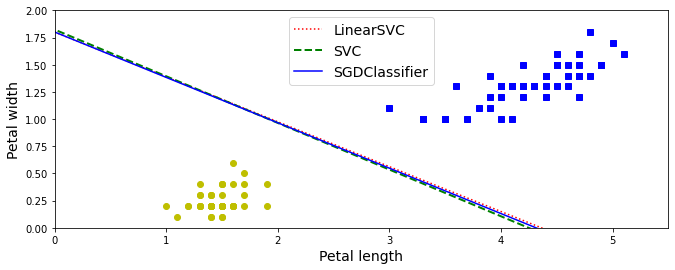

In [15]:
plt.figure(figsize=(11, 4))

plt.plot(line1[:, 0], line1[:, 1], "r:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "g--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "b-", label="SGDClassifier")


plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()


<h2> +추가) 다른 커널 트릭을 이용하면 어떨까?</h2>
<br> 데이터의 구분이 확실한 관계로, 가우시안 방사형(RBF) 커널을 사용해도 <br>
분류가 잘 되지 않을까? 라는 생각을 하게 되었습니다. 그래서 과제는 아니지만 추가적으로 진행해 보았습니다.

In [20]:
rbf_kernel_svc= Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC(kernel = "rbf", gamma = 3, C = 0.001)),
    
    
])

rbf_kernel_svc.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(C=0.001, gamma=3))])

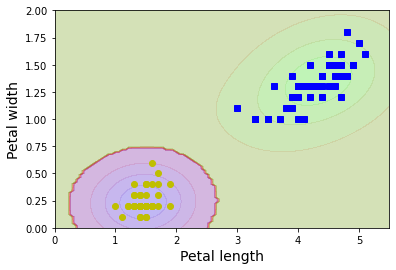

In [21]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

plt.axis([0, 5.5, 0, 2])

plot_predictions(rbf_kernel_svc, [0, 5.5, 0, 2])

gamma와 C 하이퍼 파라미터 값을 적절히 조절해 주었더니, 이와 같은 결과가 나왔습니다!